# 📊 Smart Factory Energy Prediction
This notebook implements the Mechademy Data Science Intern Assignment to predict equipment energy consumption.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("SmartFactoryDataset.csv", parse_dates=['timestamp'])
df.head()
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [4]:
# Extract time-based features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

# Drop timestamp
df.drop(columns='timestamp', inplace=True)


In [9]:
# Handle missing values
df.replace('unknown', np.nan, inplace=True)
df = df.dropna()
for col in df.select_dtypes(include='object').columns:
    df[col] = pd.factorize(df[col])[0]

C:\Users\saich\AppData\Local\Temp\ipykernel_15184\1721950981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('unknown', np.nan, inplace=True)


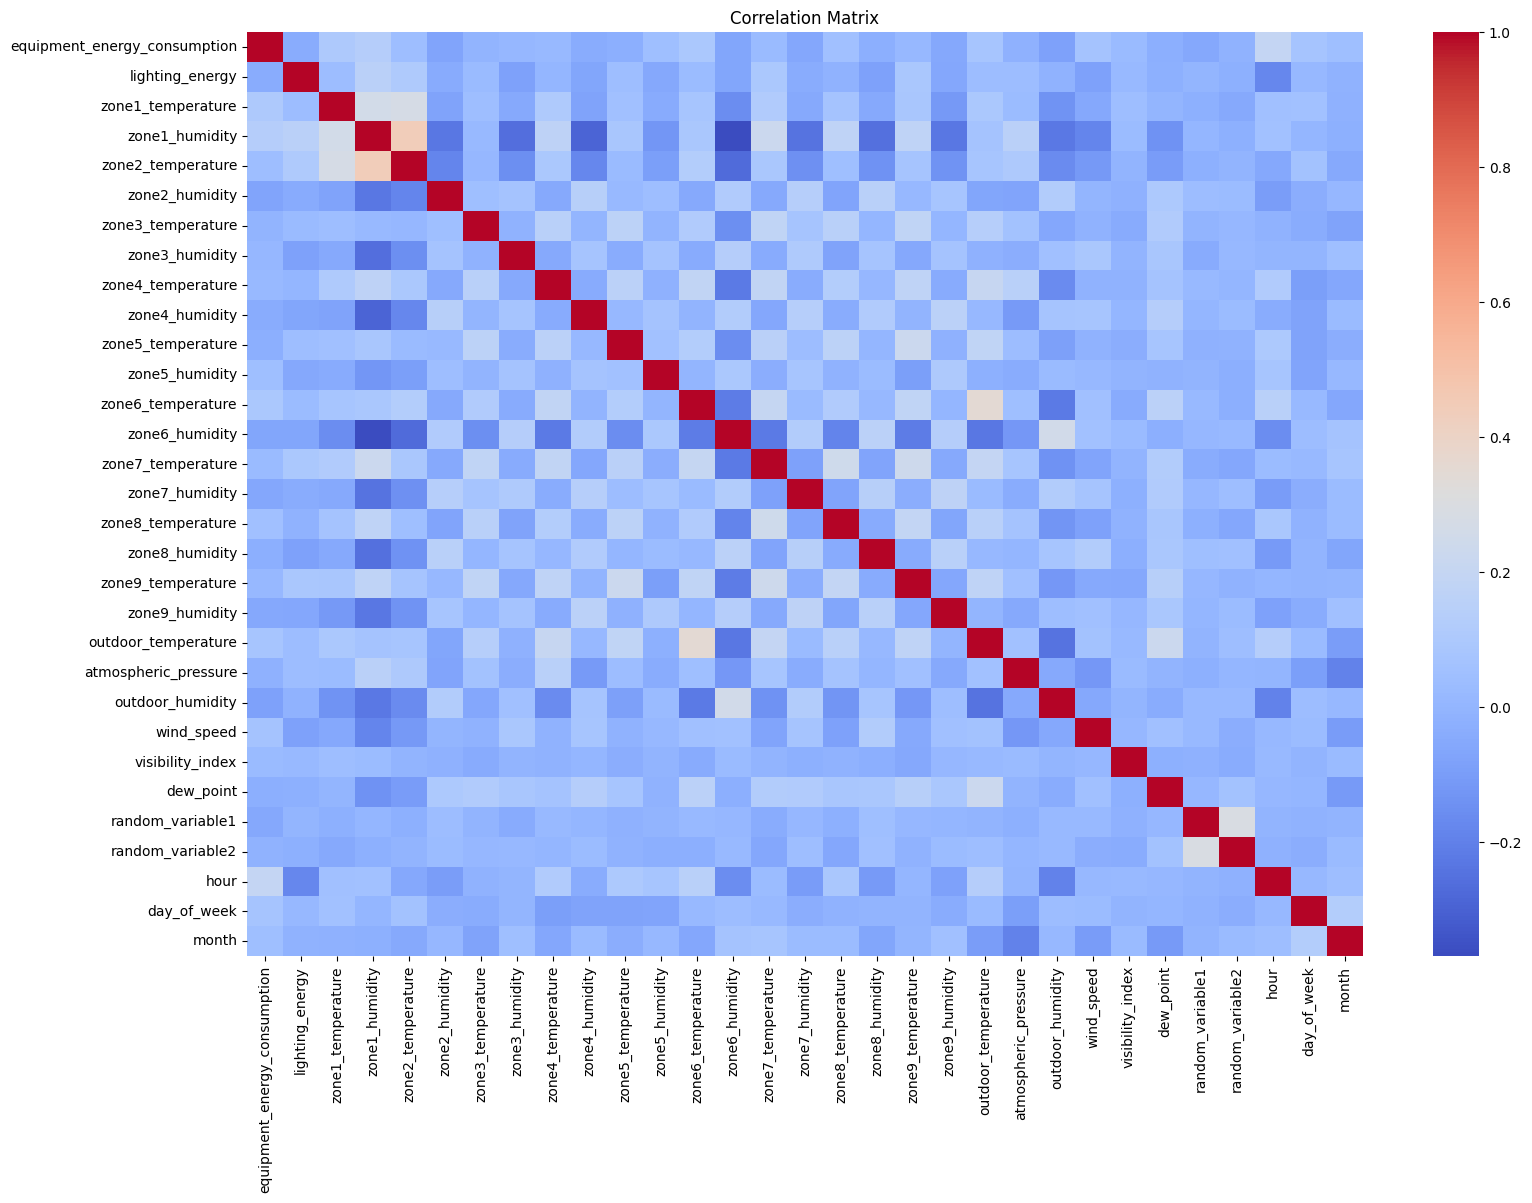

In [10]:
# Correlation heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()


In [11]:
# Drop less relevant/random variables
df = df.drop(columns=['random_variable1', 'random_variable2'])

# Define features and target
X = df.drop(columns='equipment_energy_consumption')
y = df['equipment_energy_consumption']


In [12]:
# Train/Test Split & Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Train Random Forest model
rf = RandomForestRegressor(n_estimators=150, max_depth=12, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [14]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


RMSE: 11.16
R² Score: 0.219


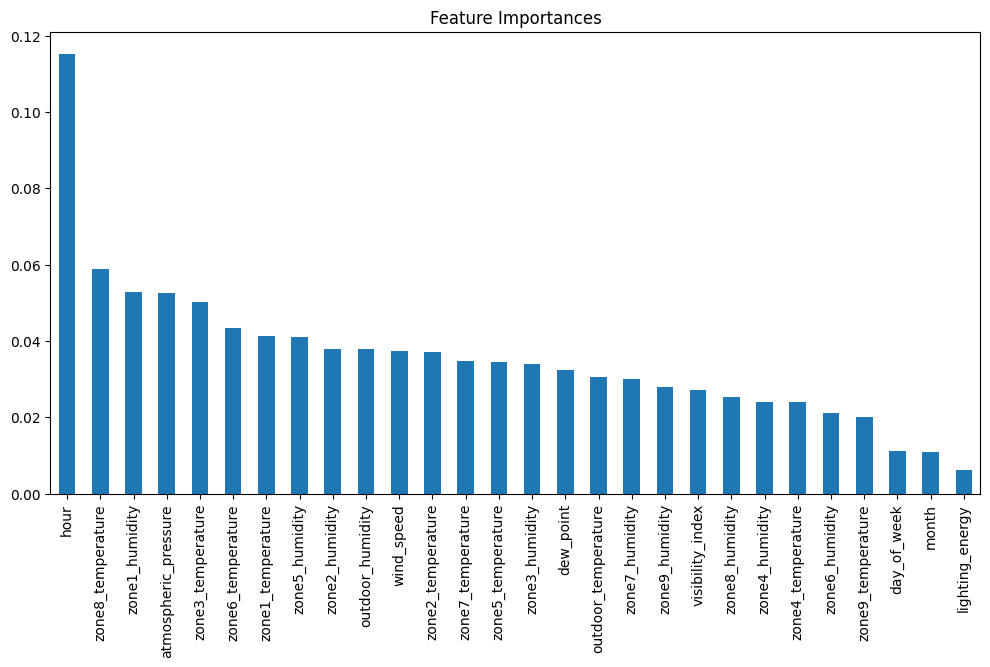

In [15]:
# Feature Importance Visualization
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

feat_importance.plot(kind='bar', figsize=(12,6), title="Feature Importances")
plt.show()
